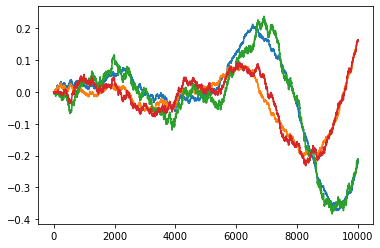

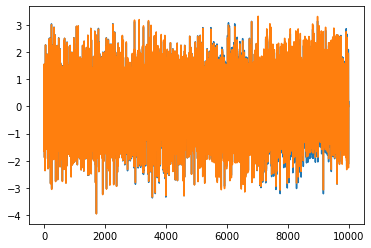

In [ ]:
# Simple implementation of continuous time kalman-bucy filter for tracking continuous varying state inputs.

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA

T = 10
dt = 0.001
N = int(T/dt)
ts = np.linspace(0,T,N)

A = np.random.normal(0,1,[2,2])
B = np.random.normal(0,1,[2,1])
C = np.random.normal(0,1,[2,2])
x = np.array([0,0]).reshape(2,1)
us = np.zeros([N,1,1]) #no actions
ws = np.random.normal(0,1,[N,1])
zs = np.random.normal(0,1,[N,1])
xhats = np.zeros([N,2,1])
phats = np.zeros([N,2,2])
R = np.identity(2)
Q = np.identity(2)


#now let's run the simulation
xs = np.zeros([N,2,1])
ys = np.zeros([N,2,1])
xs[0] = x
xdots = []
xhats[0] = x
phats[0] = np.identity(2)
for i in range(N-1):
  xdot = np.dot(A,xs[i]) + np.dot(B,us[i]) + ws[i]
  #print(xdot.shape)
  xs[i+1] = xs[i] + dt * xdot
  ys[i] = np.dot(C, xs[i+1]) + zs[i]
  K = np.dot(phats[i], np.dot(C.T, LA.inv(Q)))
  xdothat = np.dot(A, xhats[i]) + np.dot(B, us[i]) + np.dot(K, ys[i] - np.dot(C, xhats[i]))
  pdothat = np.dot(A, phats[i]) + np.dot(phats[i], A.T) + Q - np.dot(K, np.dot(R, K.T))
  xhats[i+1] = xhats[i] + dt * xdothat
  phats[i+1] = phats[i] + dt * pdothat
  xdots.append(xdot)

plt.plot(xs.reshape(N,2))
plt.plot(xhats.reshape(N,2))
plt.show()
plt.plot(ys.reshape(N,2))
plt.show()
#plt.plot(xdots)
#plt.show()

